In [1]:
import matplotlib.pyplot as plt
import numpy as np

/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:907: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)
/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:907: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)


In [2]:
# add much simpler stuff here
# introduce for loops (in and range)
# introduce functions

In [3]:
# let's write a simulation of cosmic ray air shower

# model is that at each radiation length 
#    electrons/positrons bremstrahlung
#    gammas pair produce
# energy is split among daughter products
#    if electron/positron below critical energy -> stop

In [4]:
# add several markdown headings here to step people through things

# Particle Cascades

We can illustrate the usefulness of loops and functions with a simple
example from physics. 

Cosmic ray electrons produce air showers when they interact in the atmosphere. The high-energy electron transfers some of its energy to other particles so that a cascade of hundreds or thousands of high speed particles are produced as shown in the figure below.

<img src="infiles/emshower.png">


## A Simple Model

Let's assume that there are three particles in a cascade: electrons, photons (light particles), and positrons (a positively charged electron).

Each electron or positron can split its energy with a photon that it radiates. That's drawn like this:
<img src="infiles/electron_vertices.pdf">

Each photon can make a pair of electrons and positrons. That's drawn like this:
<img src="infiles/photon_vertex.pdf">


### Now the particles multiply

So if we started out with one cosmic ray electron, we get an electron and a photon. 
Then the photon makes a new electron and a positron, while the electrons and positrons continue to make photons.

This continues so that we get a cascade of particles. 

<img src="infiles/heitler_model.pdf">

# Turning the Model into Code

Our goal will be to keep track of how many electrons, positrons, and photons we have in our cascade. 
We also want to know how much energy each of the particles has.

## Let's Code up the First Layer

First we have to chose an initial energy for the first electron, the cosmic ray electron. In this first layer, the electron will split its energy between an electron and a photon. 

In [5]:
# first layer
energy_cr = 160 # Joules, 1e21 eV

We'll use lists to keep track of the energy of electrons, positrons, and gammas that we have in the entire cascade. 

In [6]:
electrons = []
positrons = []
gammas = []

In [7]:
# energy of the CR splits into one electron and one positron
electrons_this_layer = [energy_cr/2.]
positrons_this_layer = []
gammas_this_layer    = [energy_cr/2.]

# these arrays store the particles made every layer
electrons.append(electrons_this_layer)
positrons.append(positrons_this_layer)
gammas.append(gammas_this_layer)

Each entry in the list is the particle's energy.

In [8]:
print(electrons_this_layer)
print(positrons_this_layer)
print(gammas_this_layer)
print(electrons)
print(positrons)
print(gammas)

[80.0]
[]
[80.0]
[[80.0]]
[[]]
[[80.0]]


The length of these lists tell us get the number of particles in the cascade.

In [9]:
print(len(electrons_this_layer))
print(len(positrons_this_layer))
print(len(gammas_this_layer))
print(len(electrons))
print(len(positrons))
print(len(gammas))

1
0
1
1
1
1


You might wonder why we need two arrays for each type of particle (e.g. electrons_this_layer and electrons) and why their shapes are different.

In [10]:
print(np.shape(electrons_this_layer))
print(np.shape(positrons_this_layer))
print(np.shape(gammas_this_layer))
print(np.shape(electrons))
print(np.shape(positrons))
print(np.shape(gammas))

(1,)
(0,)
(1,)
(1, 1)
(1, 0)
(1, 1)


We are using two different arrays because we want to add more particles at each layer. Each row contains a layer's worth of particles. This will be more apparent as we add more layers.

## Let's add another layer

Now all electrons make a gamma and an electron (bremstraahlung)
and all positrons make a gamma and a positron (bremstraahlung)
And all photons make a electron and positron pair (pair production)

First we'll store the last layer in a new list and then start on the new layer.

In [11]:
electrons_last_layer = electrons_this_layer
positrons_last_layer = positrons_this_layer
gammas_last_radlength = gammas_this_layer

# reset the arrays
electrons_this_layer = []
positrons_this_layer = []
gammas_this_layer    = []

Now we'll use for loops to make new particles for each particle in the previous layer. We'll start with the electrons and positrons.

In [12]:
# electrons from the last layer
# each electron makes an electron and a gamma
for el in electrons_last_layer:
    gammas_this_layer.append(el/2.)
    electrons_this_layer.append(el/2.)

# positrons from the last layer
# each positron makes a positron and a gamma
for po in positrons_last_layer:
    gammas_this_layer.append(po/2.)
    positrons_this_layer.append(po/2.)

## Your turn
Now you add the gammas!

...and now store all the particles in the electrons, positrons, and gammas lists.

In [13]:
# now store all the particles


Now figure out how many electrons, positrons, and gammas there are in the two layers and what their energies are.

# Many Layers
Now we want to let the cascade develop over many layers, say 10. 

In [14]:
# now we want to loop over many layers
n_layers = 10

# reset so we are starting at the beginning
# first radiation length
energy_cr = 160 # Joules, 1e21 eV

electrons = []
positrons = []
gammas = []

# energy of the CR splits into one electron and one gamma
electrons_this_layer = [energy_cr/2.]
positrons_this_layer = []
gammas_this_layer    = [energy_cr/2.]

# these arrays store the particles made every radiation length
electrons.append(electrons_this_layer)
positrons.append(positrons_this_layer)
gammas.append(gammas_this_layer)

for i_layer in range(n_layers):
    
    # next layer
    # now all electrons make a gamma and an electron (bremstraahlung)
    # and all positrons make a gamma and a positron (bremstraahlung)
    electrons_last_layer = electrons_this_layer
    positrons_last_layer = positrons_this_layer
    gammas_last_layeere = gammas_this_layer

    # reset the arrays
    electrons_this_layer = []
    positrons_this_layer = []
    gammas_this_layer    = []

    for el in electrons_last_layer:
        gammas_this_layer.append(el/2.)
        electrons_this_layer.append(el/2.)

    for po in positrons_last_layer:
        gammas_this_layer.append(po/2.)
        positrons_this_layer.append(po/2.)

    for ga in gammas_this_layer:
        electrons_this_layer.append(ga/2.)
        positrons_this_layer.append(ga/2.)

    # now store all the particles
    electrons.append(electrons_this_layer)
    positrons.append(positrons_this_layer)
    gammas.append(gammas_this_layer)
    
    # at each layer, let us know how many particles there are
    print(i_layer, ": ", len(electrons_this_layer) + len(positrons_this_layer) + len(gammas_this_layer))

0 :  4
1 :  12
2 :  36
3 :  108
4 :  324
5 :  972
6 :  2916
7 :  8748
8 :  26244
9 :  78732


In [15]:
# how many particles are there at each step?
for i_layer in range(len(electrons)):
    print("Layer: ", i_layer)
    print("    Number of electrons: ", len(electrons[i_layer]))
    print("    Number of positrons: ", len(positrons[i_layer]))
    print("    Number of gammas: ", len(gammas[i_layer]))

Layer:  0
    Number of electrons:  1
    Number of positrons:  0
    Number of gammas:  1
Layer:  1
    Number of electrons:  2
    Number of positrons:  1
    Number of gammas:  1
Layer:  2
    Number of electrons:  5
    Number of positrons:  4
    Number of gammas:  3
Layer:  3
    Number of electrons:  14
    Number of positrons:  13
    Number of gammas:  9
Layer:  4
    Number of electrons:  41
    Number of positrons:  40
    Number of gammas:  27
Layer:  5
    Number of electrons:  122
    Number of positrons:  121
    Number of gammas:  81
Layer:  6
    Number of electrons:  365
    Number of positrons:  364
    Number of gammas:  243
Layer:  7
    Number of electrons:  1094
    Number of positrons:  1093
    Number of gammas:  729
Layer:  8
    Number of electrons:  3281
    Number of positrons:  3280
    Number of gammas:  2187
Layer:  9
    Number of electrons:  9842
    Number of positrons:  9841
    Number of gammas:  6561
Layer:  10
    Number of electrons:  29525
    N

## Your turn
The number of particles is growing fast! Let's make a plot to see what the dependence is. We want to put the layer number on the x-axis and the number of electrons in that layer on the y-axis. How will you make the plot?

In [16]:
# Make a plot


Your plot may look exponential. If that's true, if we plot it on a log scale, it should look like a straight line, because $\ln(e^{-\alpha x}) = -\alpha x$. Try using the [plt.semilogy(...)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.semilogy.html) function in matplotlib to check it out. 

In [17]:
# Make a plot with the y-axis in a log-scale.


Can you also make a plot of the energy of the electrons (or positrons or gammas) at each layer?

In [ ]:
# Make a plot of the energy of the electrons vs. layer number


# Functions make the work easier

We can simplify this by defining a function that makes particles for each layer. 

The function below takes lists of electrons, positrons, and gammas as inputs. Then for each particle, it makes the appropriate new particles and splits the energy. The function returns the next layer of particles.

In [18]:
def make_particles(electrons, positrons, gammas):
    # now all electrons make a gamma and an electron (bremstraahlung)
    # and all positrons make a gamma and a positron (bremstraahlung)
    # and all gammas make a positron and an electron
    electrons_last_layer = electrons
    positrons_last_layer = positrons
    gammas_last_layer = gammas

    # reset the arrays
    electrons = []
    positrons = []
    gammas    = []
    
    for el in electrons_last_layer:
        gammas.append(el/2.)
        electrons.append(el/2.)

    for po in positrons_last_layer:
        gammas.append(po/2.)
        positrons.append(po/2.)

    for ga in gammas_this_layer:
        electrons.append(ga/2.)
        positrons.append(ga/2.)
    
    return electrons, positrons, gammas

Now that we have the function, we can simplify our for loop. 

In [23]:
# layers
n_layers = 10

# reset so we are starting at the beginning
# first layer
energy_cr = 160 # Joules, 1e21 eV

electrons = []
positrons = []
gammas = []

# energy of the CR splits into one electron and one gamma
electrons_this_layer = [energy_cr/2.]
positrons_this_layer = []
gammas_this_layer    = [energy_cr/2.]

# these arrays store the particles made every radiation length
electrons.append(electrons_this_layer)
positrons.append(positrons_this_layer)
gammas.append(gammas_this_layer)

for i_layer in range(n_layers):
    
    # next radiation length
    print(i_layer)
    # the \ continues the line on the next point
    electrons_this_layer, \
    positrons_this_layer, \
    gammas_this_layer = make_particles(electrons_this_layer,
                                          positrons_this_layer,
                                          gammas_this_layer)

    # now store all the particles
    electrons.append(electrons_this_layer)
    positrons.append(positrons_this_layer)
    gammas.append(gammas_this_layer)

0
1
2
3
4
5
6
7
8
9


## Your turn
Make the same plots you made before!

In [ ]:
# Make plots


How make 

In [20]:
# what are the average energies of these particles?
average_energy_electrons = []
for el in electrons:
    average_energy_electrons.append( np.mean(el) ) 
average_energy_positrons = []
for po in positrons:
    average_energy_positrons.append( np.mean(po) ) 
average_energy_gammas = []
for ga in gammas:
    average_energy_gammas.append( np.mean(ga) ) 


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0,0.5,'Energy of the Particles (Joules)')

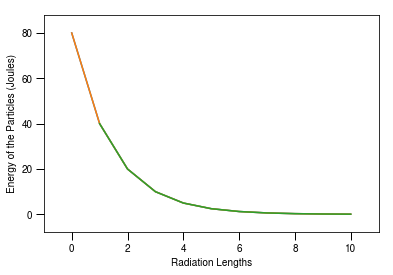

In [21]:
plt.plot(range(n_radlengths+1), average_energy_electrons)
plt.plot(range(n_radlengths+1), average_energy_positrons)
plt.plot(range(n_radlengths+1), average_energy_gammas)
plt.xlabel("Radiation Lengths")
plt.ylabel("Energy of the Particles (Joules)")